In [1]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv(r'C:\Users\milan\Desktop\Chennai price pred\train-chennai-sale.csv')
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)
df.head()

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [7]:
print(f'➤ Now the shape of the Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

➤ Now the shape of the Dataframe is 7109 rows and 19 columns.


## Cleaning

In [8]:
df.isna().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [9]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0.0,0.0,0.0,0.0,0.014067,0.070333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6752,0.0


In [10]:
# filling the missing values using statistical techniques
df = df.fillna({'n_bedroom': st.mode(df['n_bedroom']),
                'n_bathroom': st.mode(df['n_bathroom']),
                'qs_overall': df['qs_overall'].mean()})
df.isna().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7109 non-null   object 
 1   int_sqft       7109 non-null   int64  
 2   date_sale      7109 non-null   object 
 3   dist_mainroad  7109 non-null   int64  
 4   n_bedroom      7109 non-null   float64
 5   n_bathroom     7109 non-null   float64
 6   n_room         7109 non-null   int64  
 7   sale_cond      7109 non-null   object 
 8   park_facil     7109 non-null   object 
 9   date_build     7109 non-null   object 
 10  buildtype      7109 non-null   object 
 11  utility_avail  7109 non-null   object 
 12  street         7109 non-null   object 
 13  mzzone         7109 non-null   object 
 14  qs_rooms       7109 non-null   float64
 15  qs_bathroom    7109 non-null   float64
 16  qs_bedroom     7109 non-null   float64
 17  qs_overall     7109 non-null   float64
 18  sales_pr

In [12]:
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)
df['date_build'] = pd.to_datetime(df['date_build'],dayfirst=True)
df['date_sale'] = pd.to_datetime(df['date_sale'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7109 non-null   object        
 1   int_sqft       7109 non-null   int64         
 2   date_sale      7109 non-null   datetime64[ns]
 3   dist_mainroad  7109 non-null   int64         
 4   n_bedroom      7109 non-null   int32         
 5   n_bathroom     7109 non-null   int32         
 6   n_room         7109 non-null   int64         
 7   sale_cond      7109 non-null   object        
 8   park_facil     7109 non-null   object        
 9   date_build     7109 non-null   datetime64[ns]
 10  buildtype      7109 non-null   object        
 11  utility_avail  7109 non-null   object        
 12  street         7109 non-null   object        
 13  mzzone         7109 non-null   object        
 14  qs_rooms       7109 non-null   float64       
 15  qs_bathroom    7109 n

In [13]:
df['house_age'] = df['date_sale'].dt.year - df['date_build'].dt.year
df.drop(columns = ['date_build','date_sale'], inplace = True)
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [14]:
# for column "area"
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [15]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})
df['area'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [16]:
# for column "sale_cond"
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [17]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})
df['sale_cond'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [18]:
# for column "park_facil"
df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [19]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})
df['park_facil'].value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [20]:
df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [21]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [22]:
df['buildtype'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [23]:
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [24]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])
df['utility_avail'].value_counts()

No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [25]:
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [26]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df['street'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [27]:
# for column "mzzone"
df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

In [28]:
df = df.drop_duplicates()
df.shape

(7109, 18)

In [29]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


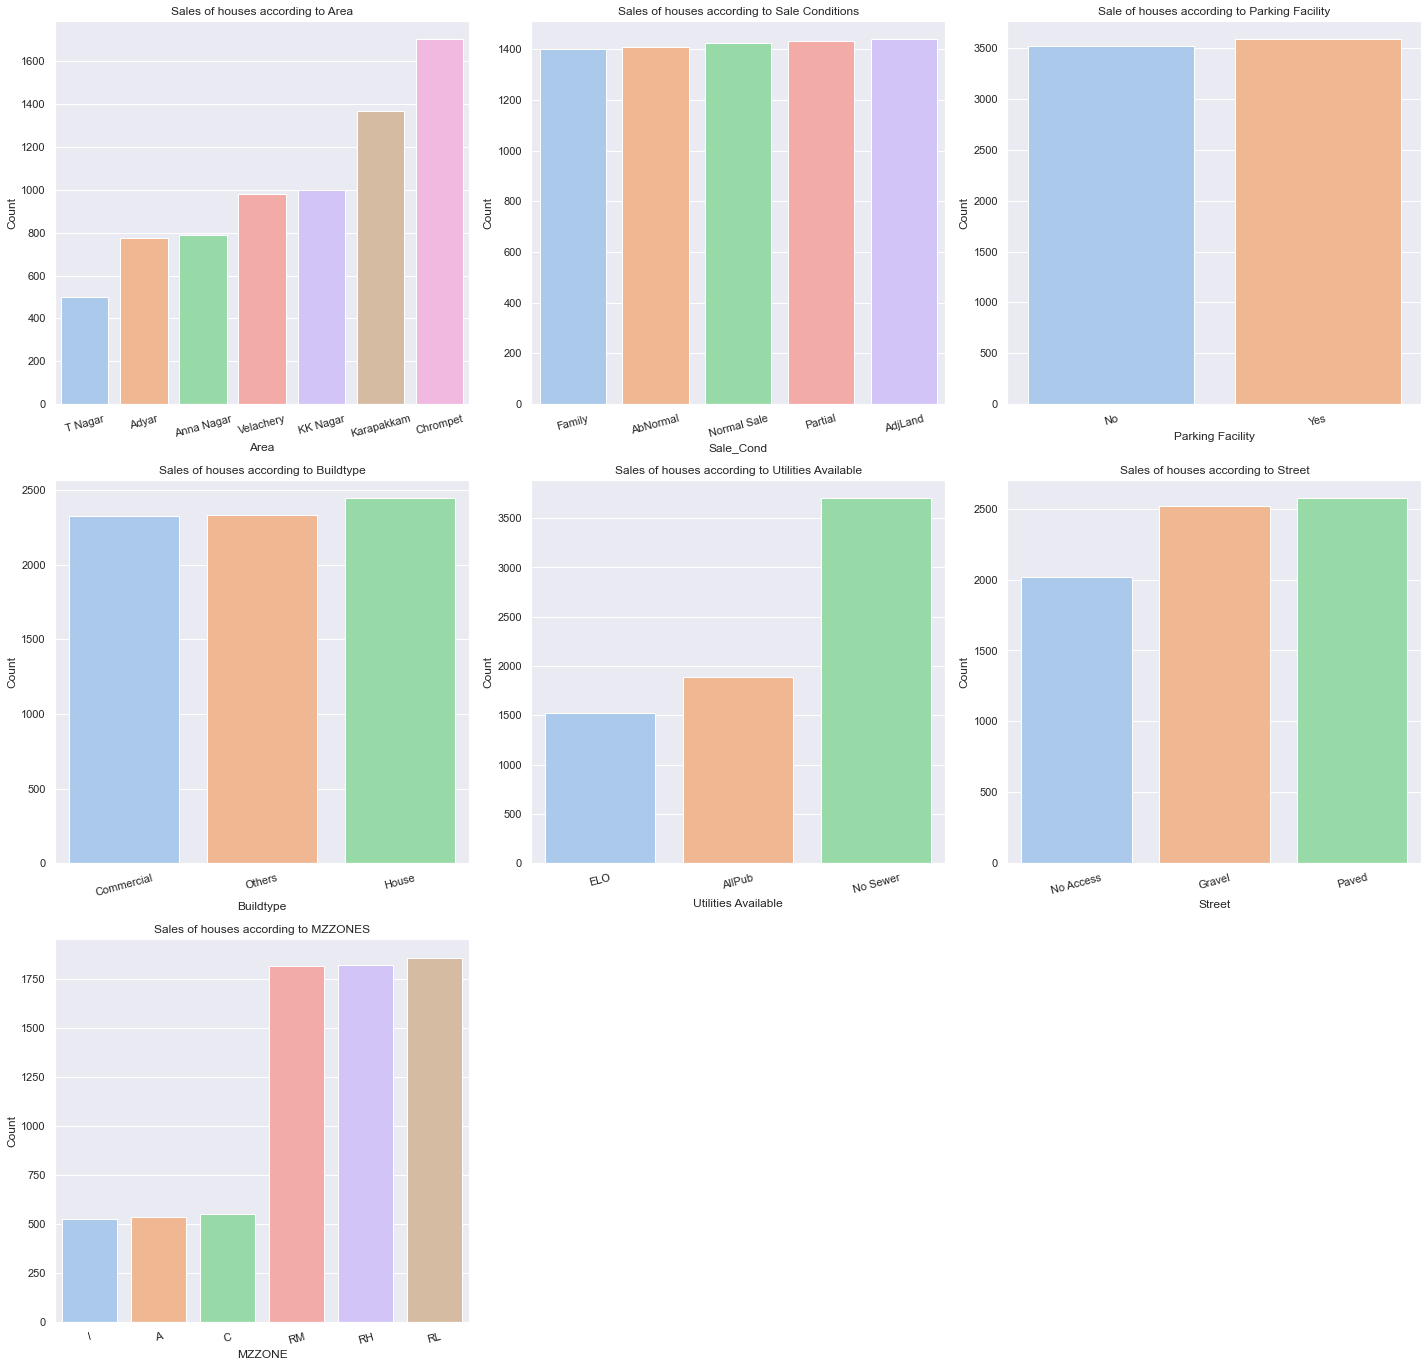

In [30]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x = df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(x = df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(x = df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(x = df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(x = df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(x = df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(x = df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

In [31]:
#orders for all the barplots in ascending order
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

In [32]:
area_order.head()

4    Karapakkam
0         Adyar
2      Chrompet
6     Velachery
3      KK Nagar
Name: area, dtype: object

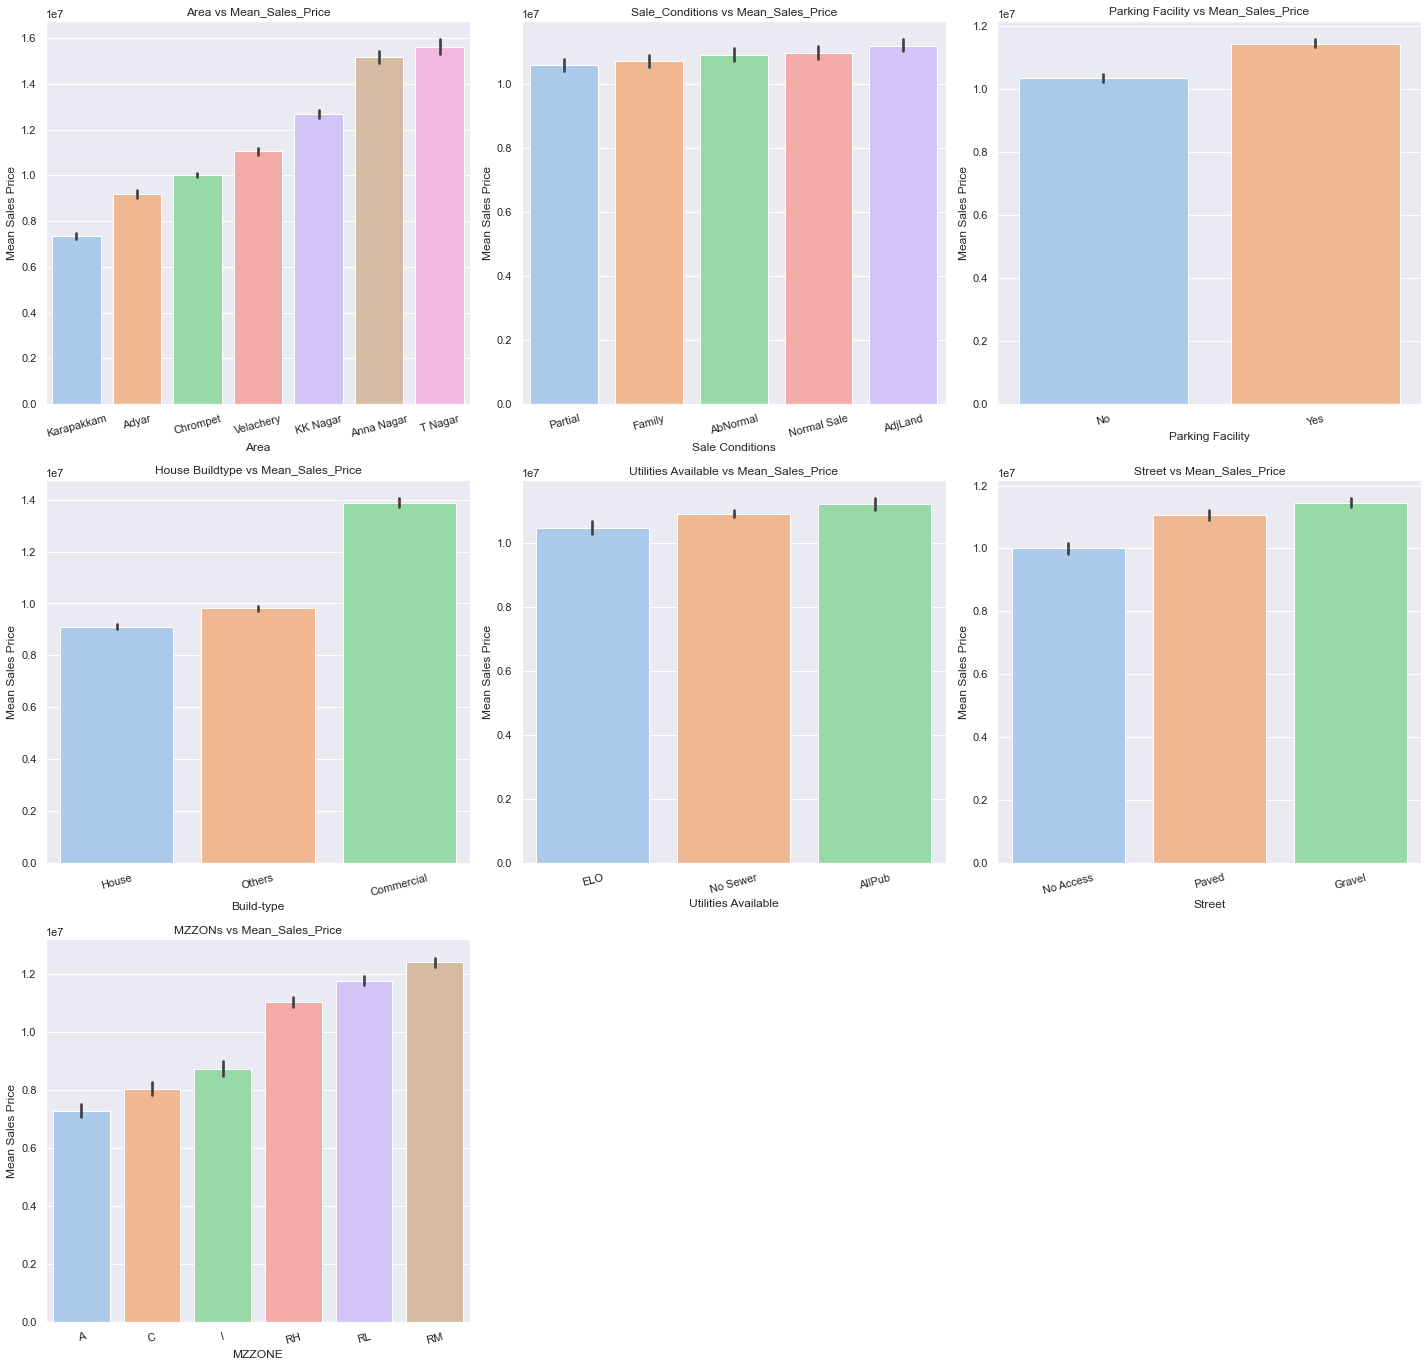

In [33]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(x = df['area'],y = df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

plt.subplot(432)
sns.barplot(x = df['sale_cond'],y = df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(x = df['park_facil'],y = df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(x = df['buildtype'],y = df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(x = df['utility_avail'],y = df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(x = df['street'],y = df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(x = df['mzzone'],y = df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

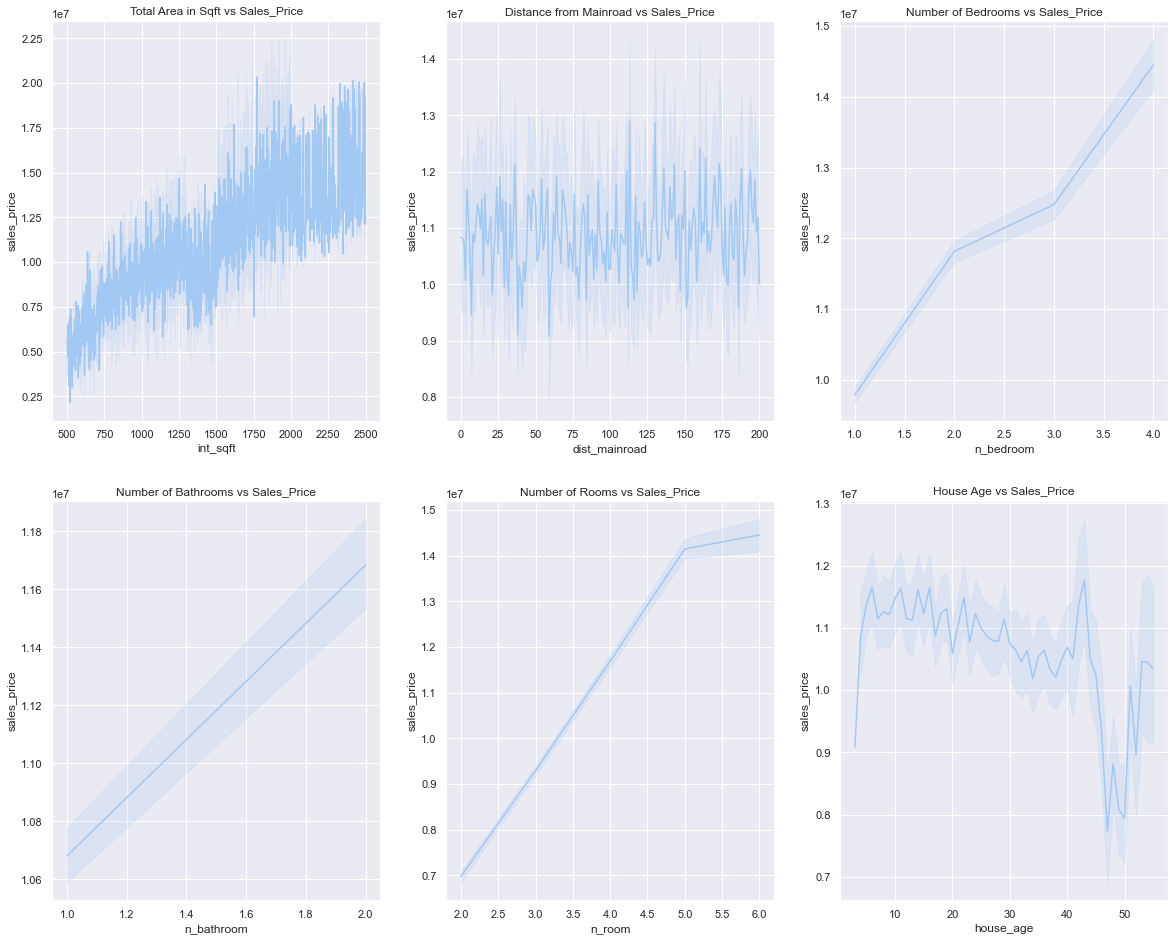

In [34]:
plt.figure(figsize=(20,25))

plt.subplot(331)
sns.lineplot(x = df['int_sqft'],y = df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')

plt.subplot(332)
sns.lineplot(x = df['dist_mainroad'],y = df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')

plt.subplot(333)
sns.lineplot(x = df['n_bedroom'],y = df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')

plt.subplot(334)
sns.lineplot(x = df['n_bathroom'],y = df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')

plt.subplot(335)
sns.lineplot(x = df['n_room'],y = df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')

plt.subplot(336)
sns.lineplot(x = df['house_age'],y = df['sales_price'])
plt.title('House Age vs Sales_Price')

plt.show()

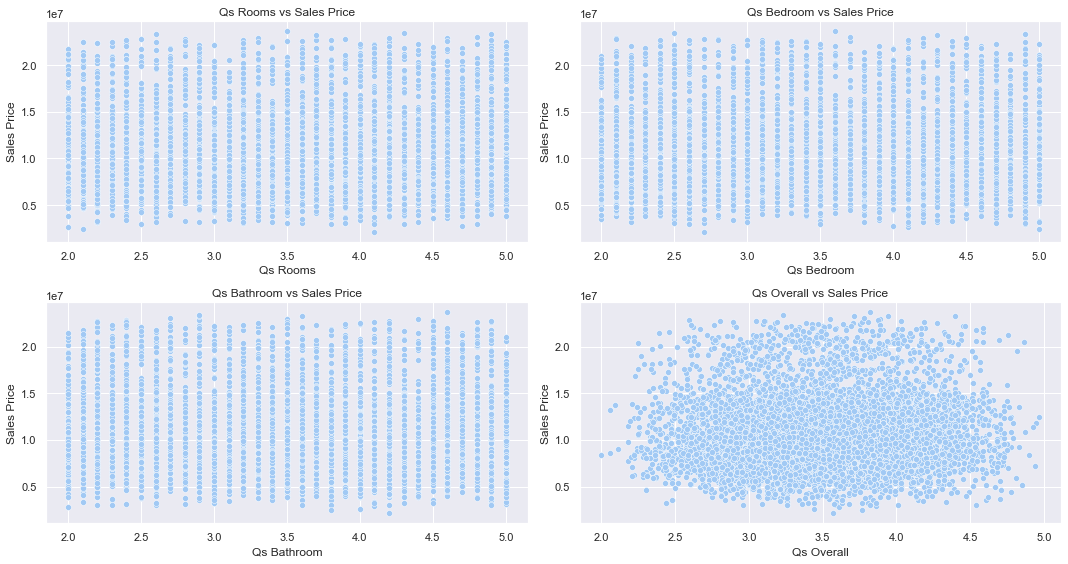

In [35]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(x = df['qs_rooms'],y = df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

plt.subplot(222)
sns.scatterplot(x = df['qs_bedroom'],y = df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

plt.subplot(223)
sns.scatterplot(x = df['qs_bathroom'],y = df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

plt.subplot(224)
sns.scatterplot(x = df['qs_overall'],y = df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

plt.tight_layout()